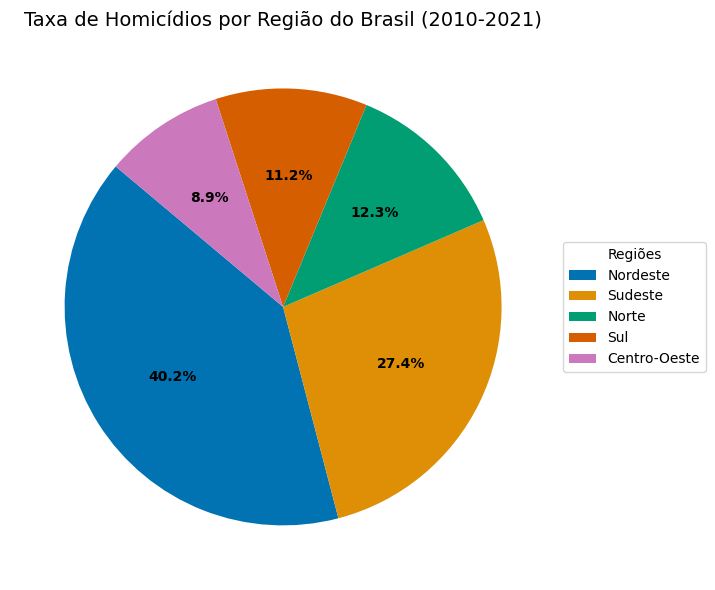

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
-

df_pib = pd.read_csv('pibtratado.csv', sep=';')
df_pop = pd.read_csv('poptratado.csv', sep=';')
df_hom = pd.read_csv('homicidiostratado.csv', sep=';')

df_pib['cod_ibge'] = df_pib['cod_ibge'].astype(str)
df_pop['cod_ibge'] = df_pop['cod_ibge'].astype(str)
df_hom['cod_ibge'] = df_hom['cod_ibge'].astype(str)

df_merged = pd.merge(df_hom, df_pop[['cod_ibge', 'ano', 'populacao']], on=['cod_ibge', 'ano'], how='left')

# Pegando a UF do arquivo do PIB
df_uf_map = df_pib[['cod_ibge', 'uf']].drop_duplicates()
df_final = pd.merge(df_merged, df_uf_map, on='cod_ibge', how='left')

uf_to_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}


df_final['regiao'] = df_final['uf'].map(uf_to_regiao)

df_regiao = df_final.groupby('regiao')['homicidios'].sum().reset_index()
df_regiao = df_regiao.sort_values('homicidios', ascending=False)


plt.figure(figsize=(10, 6))

cores = sns.color_palette('colorblind')[0:5]

wedges, texts, autotexts = plt.pie(
    df_regiao['homicidios'], 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=cores,
    pctdistance=0.6 
)

for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

plt.legend(
    wedges, 
    df_regiao['regiao'], 
    title="Regiões", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Taxa de Homicídios por Região do Brasil (2010-2021)', fontsize=14)
plt.tight_layout()
plt.savefig('taxa_homicidios_regiao.png')
plt.show()

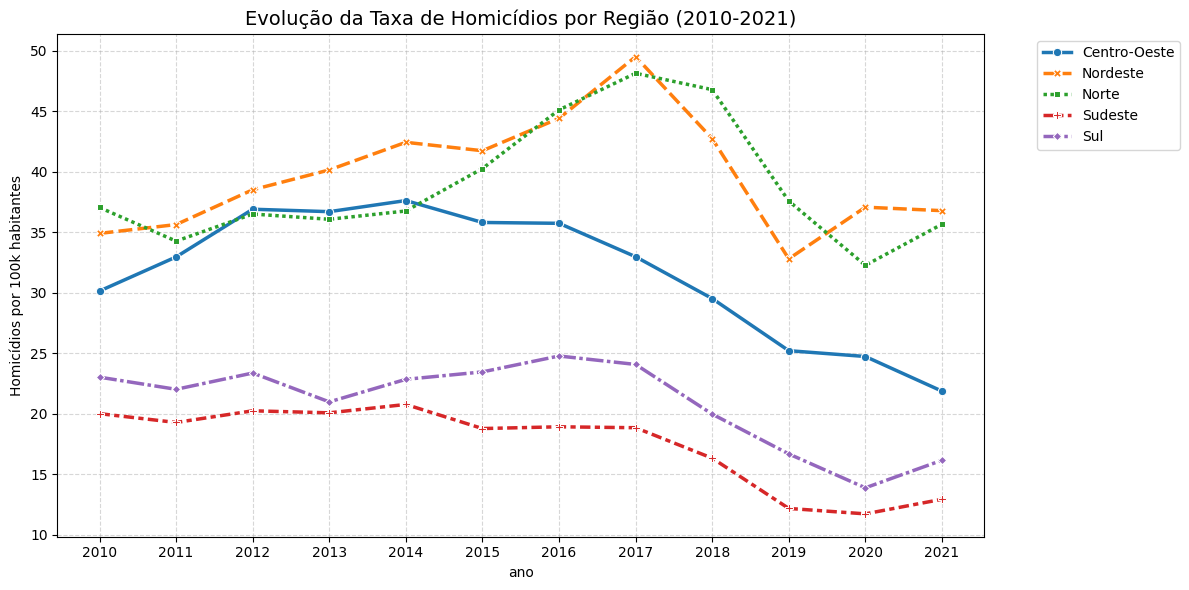

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_pib = pd.read_csv('pibtratado.csv', sep=';')
df_pop = pd.read_csv('poptratado.csv', sep=';')
df_hom = pd.read_csv('homicidiostratado.csv', sep=';')


df_pib['cod_ibge'] = df_pib['cod_ibge'].astype(str).str.slice(0, 6)
df_pop['cod_ibge'] = df_pop['cod_ibge'].astype(str).str.slice(0, 6)
df_hom['cod_ibge'] = df_hom['cod_ibge'].astype(str).str.slice(0, 6)

df_pop['ano'] = df_pop['ano'].astype(int)
df_hom['ano'] = df_hom['ano'].astype(int)
df_hom['homicidios'] = pd.to_numeric(df_hom['homicidios'], errors='coerce').fillna(0)
df_pop['populacao'] = pd.to_numeric(df_pop['populacao'], errors='coerce').fillna(0)

df_merged = pd.merge(df_hom, df_pop[['cod_ibge', 'ano', 'populacao']], on=['cod_ibge', 'ano'], how='left')

df_uf_map = df_pib[['cod_ibge', 'uf']].drop_duplicates()
df_final = pd.merge(df_merged, df_uf_map, on='cod_ibge', how='left')


uf_to_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

df_final['regiao'] = df_final['uf'].map(uf_to_regiao)

df_temporal = df_final.groupby(['ano', 'regiao'])[['homicidios', 'populacao']].sum().reset_index()


df_temporal['taxa_homicidio'] = (df_temporal['homicidios'] / df_temporal['populacao']) * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_temporal, 
    x='ano', 
    y='taxa_homicidio', 
    hue='regiao',
    style='regiao',
    markers=True,
    linewidth=2.5
)

plt.title('Evolução da Taxa de Homicídios por Região (2010-2021)', fontsize=14)
plt.ylabel('Homicídios por 100k habitantes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_temporal['ano'].unique()) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('evolucao_taxa_homicidios.png')
plt.show()

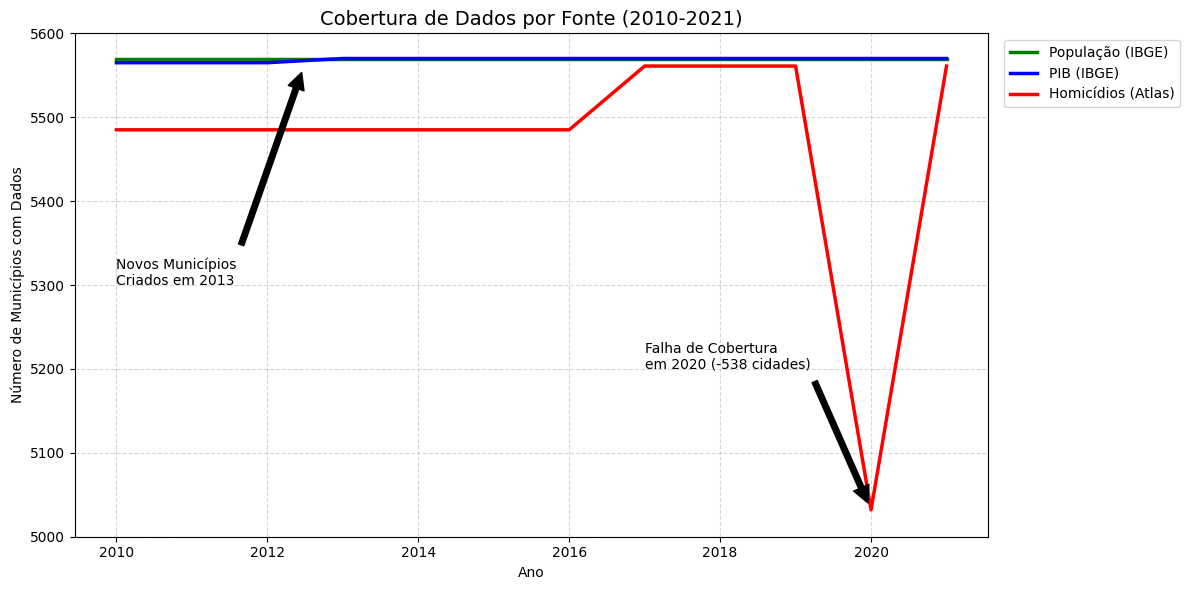

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_reais = {
    'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'População (IBGE)': [5570]*12,
    'PIB (IBGE)': [5565, 5565, 5565, 5570, 5570, 5570, 5570, 5570, 5570, 5570, 5570, 5570],
    'Homicídios (Atlas)': [5485, 5485, 5485, 5485, 5485, 5485, 5485, 5561, 5561, 5561, 5032, 5561]
}

df_plot = pd.DataFrame(dados_reais).set_index('Ano')

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_plot, dashes=False, linewidth=2.5, palette=['green', 'blue', 'red'])

plt.title('Cobertura de Dados por Fonte (2010-2021)', fontsize=14)
plt.ylabel('Número de Municípios com Dados')
plt.xlabel('Ano')
plt.ylim(5000, 5600)
plt.grid(True, linestyle='--', alpha=0.5)

plt.annotate('Falha de Cobertura\nem 2020 (-538 cidades)', 
             xy=(2020, 5032), xytext=(2017, 5200),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Novos Municípios\nCriados em 2013', 
             xy=(2012.5, 5565), xytext=(2010, 5300),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig('cobertura_dados.png')
plt.show()